[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"

sns.set(
    font="AppleGothic", 
    style="darkgrid",
    rc={'axes.unicode_minus': False}
)

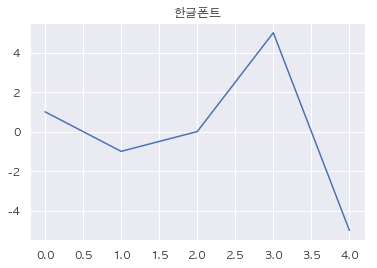

In [3]:
# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title='한글폰트')

In [4]:
# 그래프가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 데이터 로드

In [5]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df = pd.read_csv('data/전국도시공원표준데이터.csv', encoding='cp949')
df.shape

(18137, 20)

In [6]:
# 미리보기를 합니다.

df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


## Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

In [8]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import pandas_profiling

pandas_profiling.__version__

'2.4.0'

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [10]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.

from pandas_profiling import ProfileReport

%time profile = ProfileReport(df, title='도시공원 표준 데이터')

profile.to_file(output_file='05-park_pandas_profile.html')

CPU times: user 1min 1s, sys: 6.41 s, total: 1min 8s
Wall time: 51.5 s


## 기본 정보 보기

In [11]:
# info로 기본 정보를 봅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
관리번호            18137 non-null object
공원명             18137 non-null object
공원구분            18137 non-null object
소재지도로명주소        8039 non-null object
소재지지번주소         17158 non-null object
위도              18137 non-null float64
경도              18137 non-null float64
공원면적            18137 non-null float64
공원보유시설(운동시설)    4845 non-null object
공원보유시설(유희시설)    6964 non-null object
공원보유시설(편익시설)    5084 non-null object
공원보유시설(교양시설)    1160 non-null object
공원보유시설(기타시설)    3116 non-null object
지정고시일           15225 non-null object
관리기관명           17383 non-null object
전화번호            16957 non-null object
데이터기준일자         18137 non-null object
제공기관코드          18137 non-null object
제공기관명           18137 non-null object
Unnamed_19      0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.8+ MB


In [12]:
# 결측치의 수를 구합니다.

df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed_19      18137
dtype: int64

In [16]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.

round(df.isnull().mean() * 100, 2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed_19      100.00
dtype: float64

## 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

In [18]:
# 폰트 설정이 해제되었다면 다시 설정해 주세요.

sns.set(
    font="AppleGothic", 
    style="darkgrid",
    rc={'axes.unicode_minus': False}
)

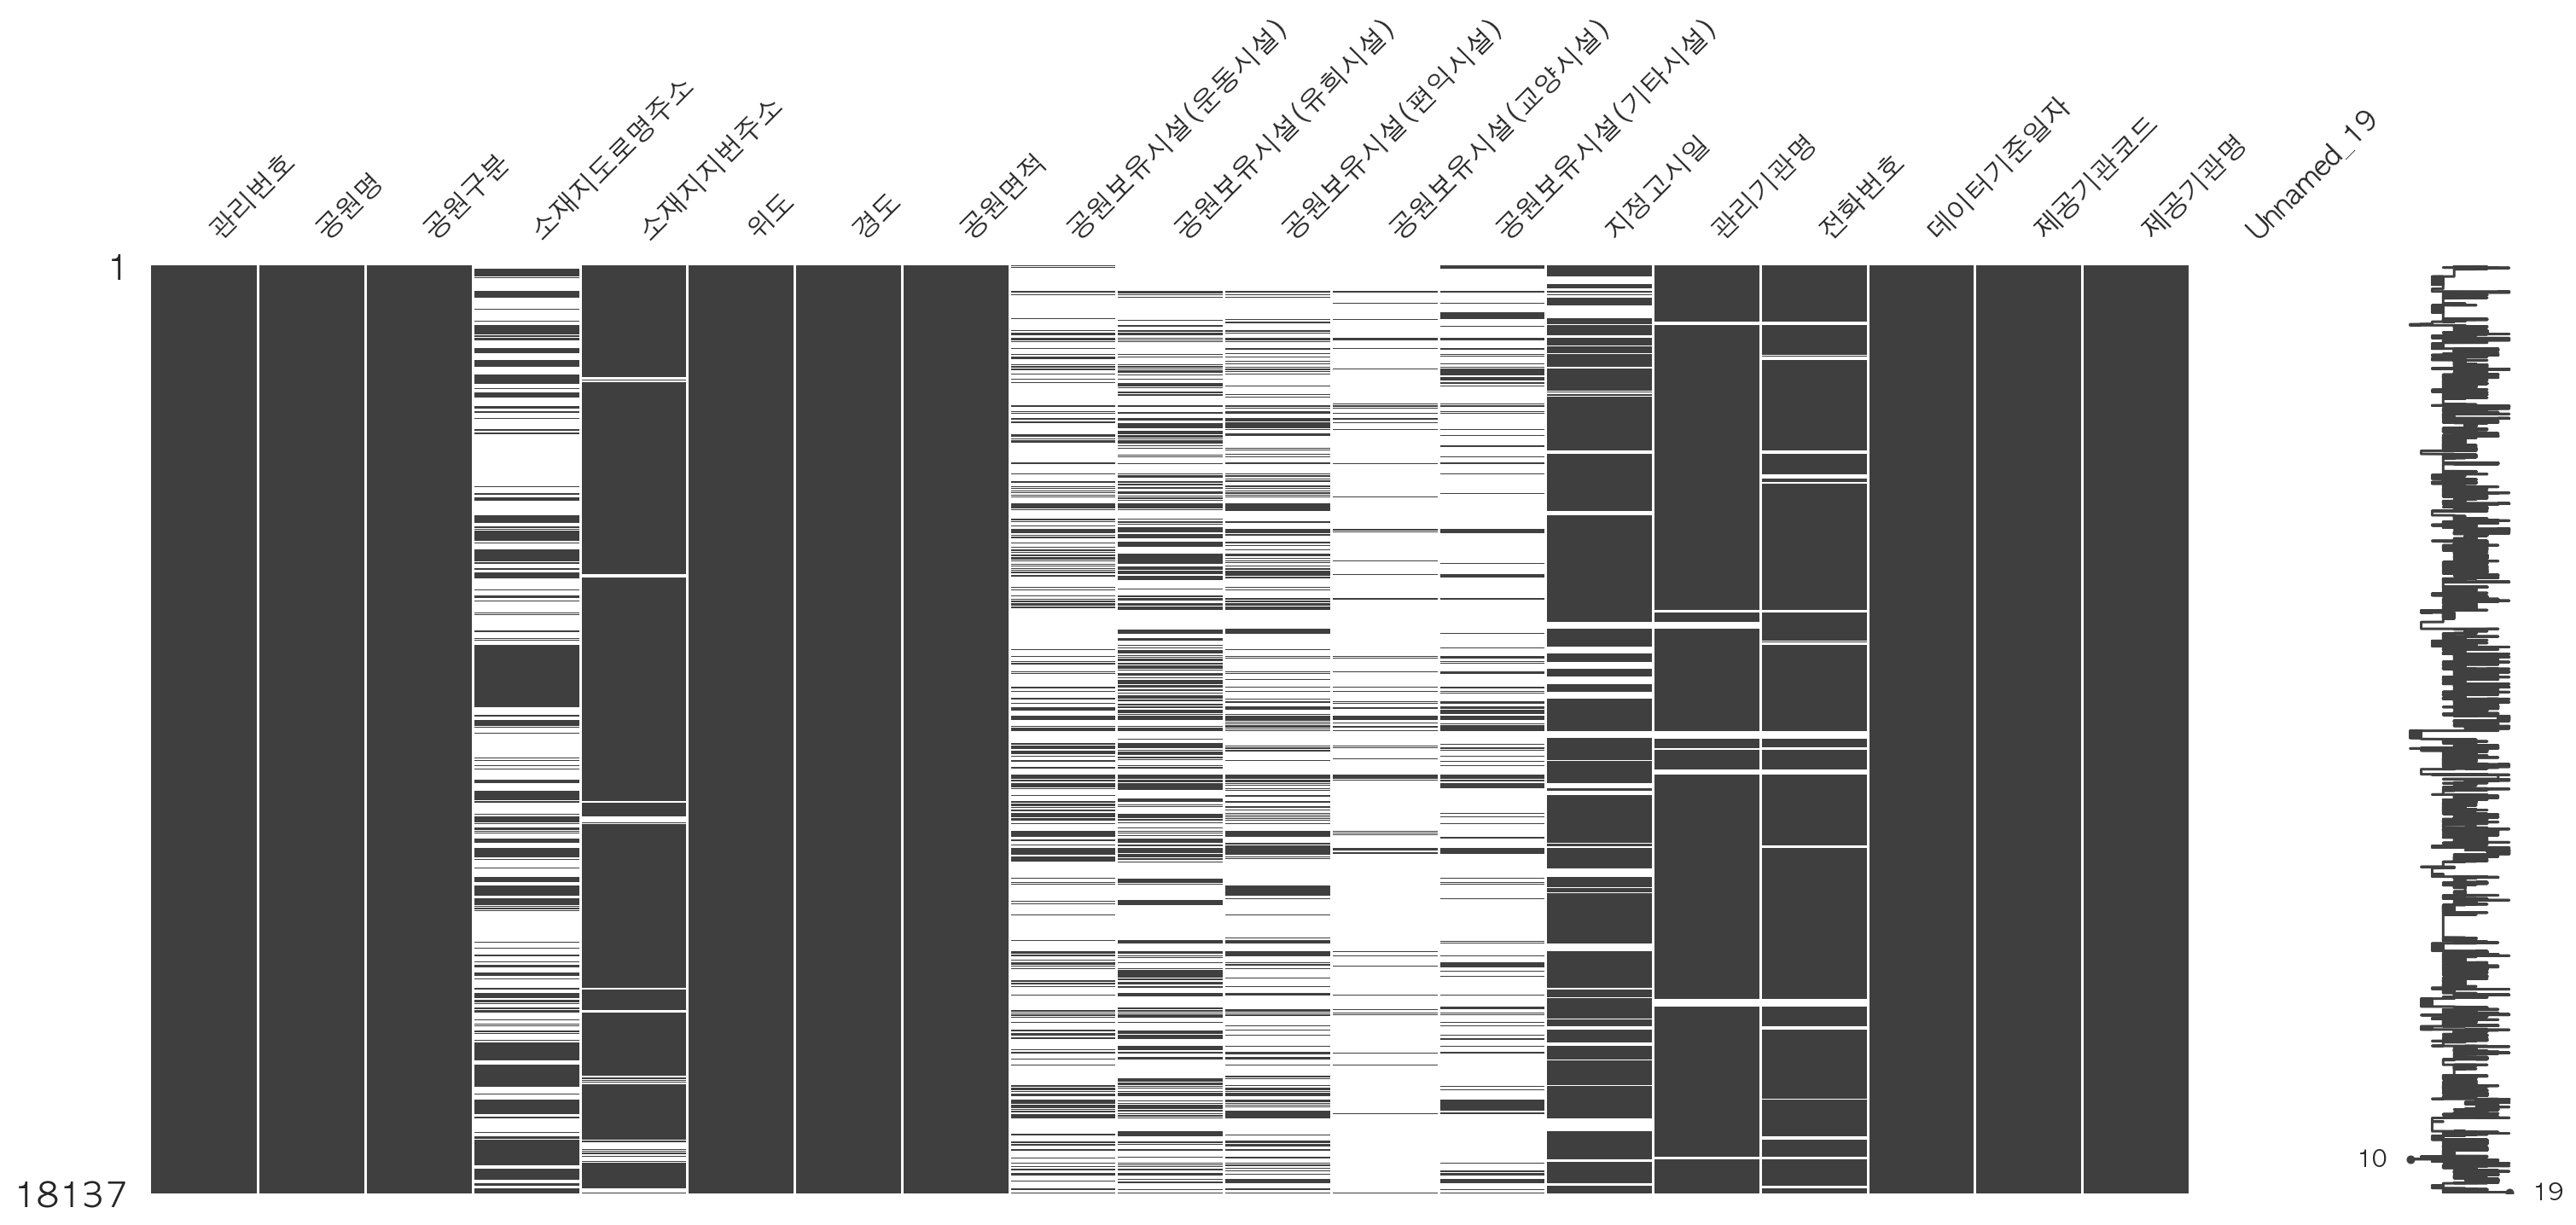

In [19]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다. 
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.

import missingno

missingno.matrix(df)

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

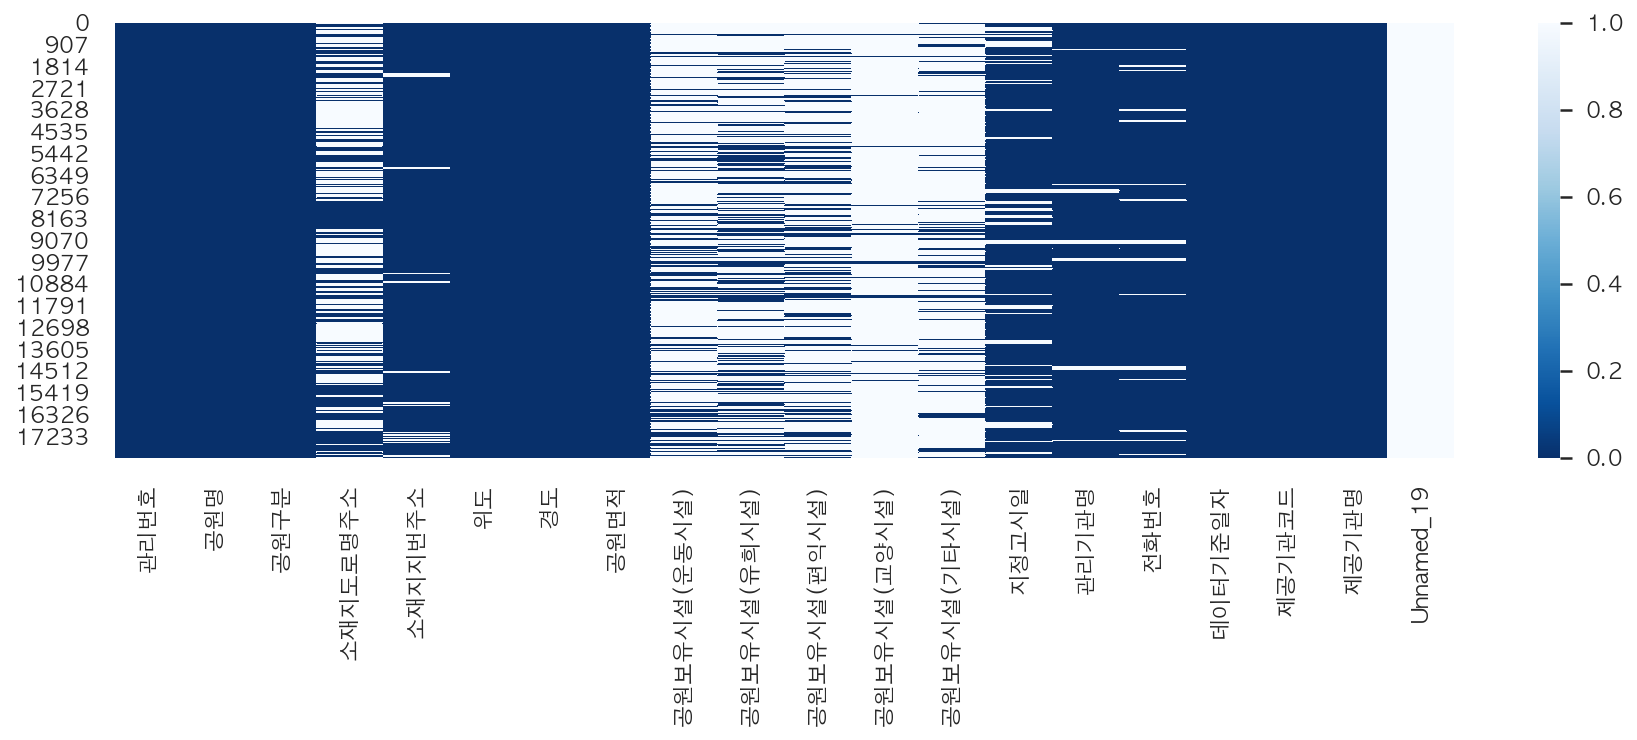

In [24]:
# seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.

null = df.isnull()

plt.figure(figsize=(15,4))
sns.heatmap(null, cmap='Blues_r')

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [25]:
# 전체 컬럼명을 출력해 봅니다.

df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed_19'],
      dtype='object')

In [26]:
# drop 으로 'Unnamed: 19' 를 제거하기

print(df.shape)
df = df.drop(['Unnamed_19'], axis=1)
print(df.shape)

(18137, 20)
(18137, 19)


## 결측치 대체
### 도로명 주소와 지번 주소 
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [29]:
# 도로명 주소의 널값 수

df['소재지도로명주소'].isnull().sum()

10098

In [30]:
# 지번 주소의 널값 수

df['소재지지번주소'].isnull().sum()

979

In [31]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.

df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
22,26440-00023,명지공원,근린공원,부산광역시 강서구 명지오션시티7로 30 (명지동),부산광역시 강서구 명지동 3247번지,35.087766,128.908524,170405.0,10,NaN,"화장실2, 주차장, 관리사무소",NaN,"바닥분수, 다목적운동장, 볼라드62, 안내판4, 안내석, 야외석물탁자5, 통돌벤치2...",2001-09-26,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
23,26440-00024,철새탐방공원,문화공원,부산광역시 강서구 명지오션시티1로 284 (명지동),부산광역시 강서구 명지동 3308-3,35.084080,128.911810,1344.0,NaN,NaN,NaN,NaN,"이층정자1, 철새탐조대1, 등의자2",2008-11-12,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
32,26440-00033,보람공원,근린공원,부산광역시 강서구 녹산산단262로14번길 20 (송정동),부산광역시 강서구 송정동 1718,35.088095,128.843216,27739.0,9,NaN,"화장실, 주차장",NaN,"그늘시렁4, 평의자9, 등의자33, 농구골대2, 다목적운동장, 문주4, 안내판2, ...",1992-03-26,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
38,26440-00039,지사공원(2호근린공원),근린공원,부산광역시 강서구 과학산단2로20번길 7-7 (지사동),부산광역시 강서구 지사동 1180,35.151337,128.831400,11232.0,13,조합놀이기구,문화회관,NaN,"전시벽6, 상징조형물, 파고라, 야외무대62.1㎡, 평의자3, 등의자6, 연식의자1...",2002-11-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
44,26440-00045,화암공원,근린공원,부산광역시 강서구 화전산단5로 131 (화전동),부산광역시 강서구 화전동 554-3,35.110563,128.877536,21908.0,9,조합놀이기구1,화장실,민속문화기념물(동제당),"사각플랜터11, 해시계광장조형물, 입체간판, 파고라7, 평상7, 막구조파고라12, ...",2005-12-30,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
45,26440-00046,화전공원,근린공원,부산광역시 강서구 화전산단5로 84 (화전동),부산광역시 강서구 화전동 582-1,35.105611,128.879107,16113.0,14,NaN,화장실,NaN,"등의자12, 평의자14, 다목적운동장, 지압보도38m, 볼라드3, 안내판2, 음수전...",2005-12-30,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구
72,42110-00001,우두산공원,근린공원,강원도 춘천시 우두동 산 5,강원도 춘천시 우두동 산 5,37.916638,127.741485,152848.0,NaN,NaN,NaN,NaN,NaN,1965-10-18,춘천시,033-250-3151,2019-08-13,4180000,강원도 춘천시
73,42110-00002,폭포공원,근린공원,강원도 춘천시 후평동 824-1,강원도 춘천시 후평동 824-1,37.875965,127.753452,11195.0,NaN,NaN,NaN,NaN,NaN,1983-10-24,춘천시,033-250-3151,2019-08-13,4180000,강원도 춘천시
74,42110-00003,석사공원,근린공원,강원도 춘천시 석사동 757,강원도 춘천시 석사동 757,37.864717,127.753005,335078.0,NaN,NaN,NaN,NaN,NaN,1987-06-20,춘천시,033-250-3151,2019-08-13,4180000,강원도 춘천시
75,42110-00004,벌말공원,근린공원,강원도 춘천시 석사동 658,강원도 춘천시 석사동 658,37.858375,127.740632,11450.0,NaN,NaN,NaN,NaN,NaN,1988-08-17,춘천시,033-250-3151,2019-08-13,4180000,강원도 춘천시


In [33]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.

df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])

In [34]:
# "소재지도로명주소"의 결측치수를 세어봅니다.

df['소재지도로명주소'].isnull().sum()

0

In [ ]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.

df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()]